# **Prediction of house prices with regressions**

## Introduction

The aim of this Notebook is to use **AI NOTEBOOKS** product to train a simple model, on the *Boston housing dataset*, with the PyTorch library. It is an exemple of neural network for regression between data.

## Code

The neural network will be set up in different step. First, librairies have to be imported. Next, the dataset will be loaded, the confusion matrix printed and boss explained.
After having split the dataset, the neural network model will be defined and trained. Finally, the R squared score will be printed and the loss displayed.

### Step 1 - librairies importation (and intallation if required)

In [ ]:
!pip install pandas sklearn matplotlib seaborn numpy

⚠️ Remember to restart the kernel after installation.

In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

import pandas as pd

import seaborn as sns
import numpy as np

### Step 2 - Load and explain the dataset

In [ ]:
# data opening
dataset_boston = load_boston()

In [3]:
dataset = pd.DataFrame(dataset_boston.data, columns = dataset_boston.feature_names)

# overview of the dataset
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


The Boston dataset has 506 rows and 15 columns.

This data frame contains the following columns:


- unnamed column: corresponding to index. It is deleted.

**INPUTS**

- crim: per capita crime rate by town.

- zn: proportion of residential land zoned for lots over 25,000 sq.ft.

- indus: proportion of non-retail business acres per town.

- chas: Charles River dummy variable (= 1 if tract bounds river ; 0 otherwise).

- nox: nitrogen oxides concentration (parts per 10 million).

- rm: average number of rooms per dwelling.

- age: proportion of owner-occupied units built prior to 1940.

- dis: weighted mean of distances to five Boston employment centres.

- rad: index of accessibility to radial highways.

- tax: full-value property-tax rate per \$10.000.

- ptratio: pupil-teacher ratio by town.

- b: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- lstat: lower status of the population (percent).

**OUTPUT**

- medv: median value of owner-occupied homes in \$1000s.

### Step 3 - Display the confusion matrix

If you have a data set with many columns, a good way to check correlations among columns is by visualizing the correlation matrix.

The orange colour means positive and purple one means negative. The stronger the color, the larger the correlation magnitude. 

- First, check what is the strongest correletion with medv (the output), except the main diagonal

- Next, verify what are the four other variables most correlated with medv

[]

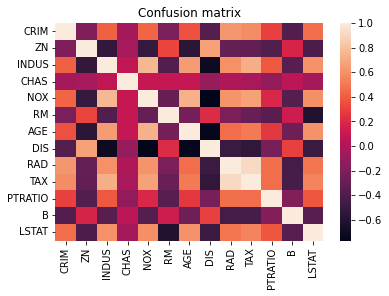

In [4]:
# confusion matrix
correlation = dataset.corr()
fig = sns.heatmap(correlation)
fig.set_title('Confusion matrix')
fig.plot()

Parameters which are the most corralated with **medv** :
- rm: 0.8
- lstat : - 0.8
- tax: 0.5
- indus: - 0.5
- ptratio: - 0.5

### Step 4 - Split the dataset

In [5]:
# input of the neural network
X = dataset_boston.data

# output of the neural network
y = dataset_boston.target
Y = y.astype("float64")

# train and test split : 20 % for the test and 80 % for the learning
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# convert split data from numpy array to Pytorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

### Step 5 - Train model

In [6]:
# defining the neural network model
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        # fully connected layer : 13 input features for 13 parameters in X
        self.layer1 = nn.Linear(in_features=13, out_features=50)
        # fully connected layer
        self.layer2 = nn.Linear(in_features=50, out_features=50)
        # output layer : 1 output features for 1 species
        self.output = nn.Linear(in_features=50, out_features=1)
     
    def forward(self, x):
        # activation fonction : reLU
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output(x)
        return x
    
# display the model architecture
model = Model()
print(model)

# measure loss (for regression mean squared loss)
criterion = nn.MSELoss()
# optimizer Adam with a learning rate of 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

epoch_list = []
loss_list = []
# the model will be train during 600 epochs
epochs = 600
for i in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    loss_list.append(loss.item())
    epoch_list.append(i)
    optimizer.step()
    if i > 0 and i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

# print the last loss
print('Last value of loss: ',loss_list[599])

Model(
  (layer1): Linear(in_features=13, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=1, bias=True)
)


/opt/conda/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([404])) that is different to the input size (torch.Size([404, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 10 Loss: 318.6713562011719
Epoch: 20 Loss: 194.0258026123047
Epoch: 30 Loss: 127.85427856445312
Epoch: 40 Loss: 104.75790405273438
Epoch: 50 Loss: 97.19984436035156
Epoch: 60 Loss: 91.97996520996094
Epoch: 70 Loss: 90.9835433959961
Epoch: 80 Loss: 90.24881744384766
Epoch: 90 Loss: 89.7558364868164
Epoch: 100 Loss: 89.33284759521484
Epoch: 110 Loss: 88.98990631103516
Epoch: 120 Loss: 88.6785659790039
Epoch: 130 Loss: 88.34981536865234
Epoch: 140 Loss: 87.9941177368164
Epoch: 150 Loss: 87.60692596435547
Epoch: 160 Loss: 87.42369079589844
Epoch: 170 Loss: 87.30652618408203
Epoch: 180 Loss: 87.22322845458984
Epoch: 190 Loss: 87.16268920898438
Epoch: 200 Loss: 87.1114273071289
Epoch: 210 Loss: 87.06806945800781
Epoch: 220 Loss: 87.02974700927734
Epoch: 230 Loss: 86.99620056152344
Epoch: 240 Loss: 86.96626281738281
Epoch: 250 Loss: 86.9393539428711
Epoch: 260 Loss: 86.91511535644531
Epoch: 270 Loss: 86.89303588867188
Epoch: 280 Loss: 86.87281036376953
Epoch: 290 Loss: 86.8540649414062

### Step 6 - Print the R squared score (R²)

The Pearson linear coefficient of determination, noted R², is a measure of the quality of the prediction of a linear regression. The closer it is to 1, the better.

In [7]:
# calculate the R2 score (Pearson's linear coefficient of determination)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('R2 score for the train: ',lm.score(X_train,y_train))
print('R2 score for the test: ',lm.score(X_test,y_test))

R2 score for the train:  0.7730135520512351
R2 score for the test:  0.5892230674471962


### Step 7 - Loss display

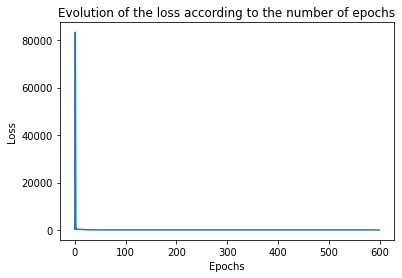

In [8]:
# display the graph of loss
plt.plot(epoch_list,loss_list)
plt.title("Evolution of the loss according to the number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Conclusion

- The loss of this neural network is quite low (86.416).
- The R² score is not bad but it could be better than 77 %. 

To conclude, this neural network could be better if we take more input parameters. We can also increse the number of epoch with care of overfitting.